# **README**

---


*Regresión lineal en Python*

---


This program is a simple implementation of linear regression models in Python. It includes functions for both 1D (single-variable) and multidimensional (multi-variable) linear regression. The program uses numpy for numerical computations and matplotlib for visualizations.

Table of Contents


*   Introduction
*   Installation
*   Usage
    *   1D Linear Regression
    *   Multidimensional Linear Regression
    *   Plotting Data
*   Functions Overview
    *   CreatePoints1D
    *   CreatePointsMD
    *   LinearRegression1D
    *   LinearRegressionMD
    *   ShowTendency


**Introduction**


---


This program provides a straightforward implementation of linear regression techniques:

*  1D Linear Regression: Fits a linear model to a single independent variable.
*  Multidimensional Linear Regression: Fits a linear model to multiple independent variables.
*  Visualization: Includes functions for generating and visualizing data, and for plotting the relationship between actual and predicted values.

**Installation**


---


To run this program, you need Python installed on your system. You also need to install the following Python packages:

*  pip install numpy matplotlib

**Usage**


---



*   1D Linear Regression

    Generate 1D data points using CreatePoints1D and apply linear regression with LinearRegression1D to calculate the slope and intercept.

*   Multidimensional Linear Regression

    Generate multidimensional data points with CreatePointsMD and perform linear regression using LinearRegressionMD to obtain regression coefficients.

*   Plotting Data

    Visualize the relationship between the actual and predicted values using ShowTendency to create scatter and trend line plots.



In [187]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [188]:
def CreatePoints1D(n_samples, std):
    """
    Generate 1D points with added noise.

    Parameters:
    ----------
    n_samples : int
        The number of samples to generate. This defines the upper limit for the
        range of X values.
    std : float
        The standard deviation of the Gaussian noise added to the Y values.

    Returns:
    -------
    ones : numpy.ndarray
        A 2D array where the first column contains the X values (ranging from 1
        to n_samples-1)
        and the second column contains ones.
    Y : numpy.ndarray
        A 1D array containing the Y values, which are generated based on a r
        andom linear relationship with X and added Gaussian noise with the
        specified standard deviation.
    """
    X = np.arange(1, n_samples, 1)
    ones = np.ones([X.shape[0], 2])
    ones[:, 0] = X
    Y = (np.random.rand() * X) + np.random.rand()
    Y = Y + np.random.normal(0, std, len(X))
    return ones, Y

X, Y = CreatePoints1D(100, 7.5)


In [189]:
def CreatePointsMD(n_variables, n_samples, std):
    """
    Generate multidimensional data points with added noise.

    Parameters:
    ----------
    n_variables : int
        The number of variables (features) for each sample.
    n_samples : int
        The number of samples to generate.
    std : float
        The standard deviation of the Gaussian noise added to the Y values.

    Returns:
    -------
    X_ : numpy.ndarray
        A 2D array of shape (n_samples, n_variables + 1), where the first
        n_variables columns contain the generated random features, and the last
        column contains ones.
    Y : numpy.ndarray
        A 2D array of shape (n_samples, 1) containing the Y values, which are
        generated based on a random linear relationship with the features and
        added Gaussian noise with the specified standard deviation.
    """
    X = np.random.rand(n_samples, n_variables)
    X=np.sort(X,axis=0)
    X_ = np.ones([n_samples, n_variables+1])
    X_[:, :n_variables] = X
    beta = np.random.rand(1,n_variables+1)*20
    print(beta)
    Y = beta@X_.T + np.random.normal(0, std, size = [1, n_samples])
    return (X_,Y.T)


[[18.23140459 11.53491299  6.99554134]]


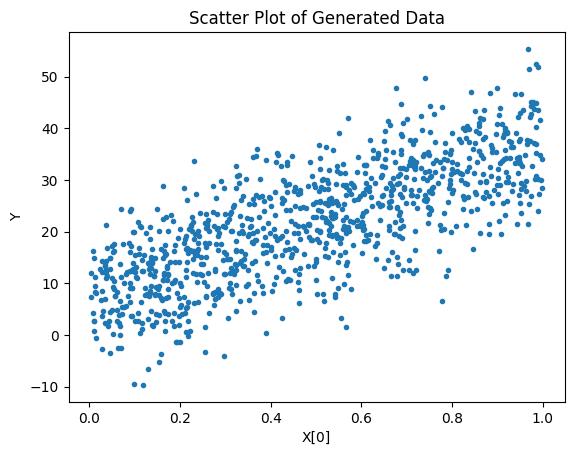

In [190]:
# Generar puntos 2D con ruido utilizando la función CreatePointsMD
X, Y = CreatePointsMD(2, 1000, 7.5)

# Crear un gráfico de dispersión (scatter plot) utilizando los primeros dos
#atributos de X y los valores de Y

plt.plot(X[:, 0], Y, '.')  # X[:, 0] representa la primera columna de X
plt.xlabel("X[0]")  # Etiqueta del eje X
plt.ylabel("Y")      # Etiqueta del eje Y
plt.title("Scatter Plot of Generated Data")  # Título del gráfico
plt.show()  # Mostrar el gráfico


In [191]:
def ShowTendency(X,X_pred, Y, Y_pred):
    """
    Display a scatter plot of the actual data points and a line plot of the
    predicted values.

    Parameters:
    ----------
    X : array-like
        The input data (features) for the X-axis. Typically a 1D array or a
        column vector.
    X_pred : array-like
        The input data (features) for the X-axis in prediction. Typically a 1D array or a
        column vector.
    Y : array-like
        The actual output data (target values) for the Y-axis.
    Y_pred : array-like
        The predicted output data (predicted values) to plot as a trend line.

    Returns:
    -------
    None
        This function does not return any values. It displays a plot showing
        the relationship between X and Y, with a trend line for Y_pred.
    """
    plt.scatter(X, Y, label='Actual Data')
    plt.plot(X_pred, Y_pred, '-', c='r', label='Predicted Trend')
    plt.xlabel("X")  # Etiqueta del eje X
    plt.ylabel("Y")  # Etiqueta del eje Y
    plt.title("Actual vs Predicted Trend")  # Título del gráfico
    plt.legend()  #Datos reales y la predicción
    plt.show()


In [192]:
def LinearRegression1D(X, Y):
    """
    Perform a simple linear regression on 1D data.

    This function calculates the parameters (slope and intercept) of a linear
    regression model that fits the given input data.

    Parameters:
    ----------
    X : array-like
        A 1D array representing the independent variable (feature).
    Y : array-like
        A 1D array representing the dependent variable (target).

    Returns:
    -------
    alpha : numpy.ndarray
        A 1D array containing two elements:
        - alpha[0]: The slope of the linear regression line.
        - alpha[1]: The intercept of the linear regression line.
    """
    y_mean = Y.mean()
    x_mean = X.mean(axis=0)
    alpha = np.ones(2)

    # Calculate the slope (alpha[0])
    a = np.sum((Y - y_mean) * X) / np.sum((X - x_mean) * X)
    alpha[0] = a

    # Calculate the intercept (alpha[1])
    b = np.sum(Y - (X * alpha[0])) / (X.shape[0] + 1)
    alpha[1] = b

    return alpha

a = LinearRegression1D(X, Y)


In [193]:
def LinearRegressionMD(X, Y):
    """
    Perform a multiple linear regression on multidimensional data.

    This function calculates the regression coefficients (beta) for a multiple
    linear regression model that fits the given input data.

    Parameters:
    ----------
    X : numpy.ndarray
        A 2D array where each row is a sample and each column is a feature
        (including the bias term, typically a column of ones).
    Y : numpy.ndarray
        A 1D or 2D array representing the dependent variable(s).

    Returns:
    -------
    beta : numpy.ndarray
        A 1D or 2D array of regression coefficients, where each coefficient
        corresponds to a feature in X.
    """
    M1 = np.linalg.inv(np.transpose(X) @ X)
    M2 = np.transpose(X) @ Y  # Matrix product of X^T and Y
    beta = M1 @ M2  # Regression coefficients

    return beta


In [194]:
Beta=LinearRegressionMD(X,Y)
print(Beta)

[[16.24428396]
 [13.16716379]
 [ 7.17718227]]


In [195]:
X_=np.arange(0,1,0.001)
y_pred1=X_*Beta[0]+Beta[-1]

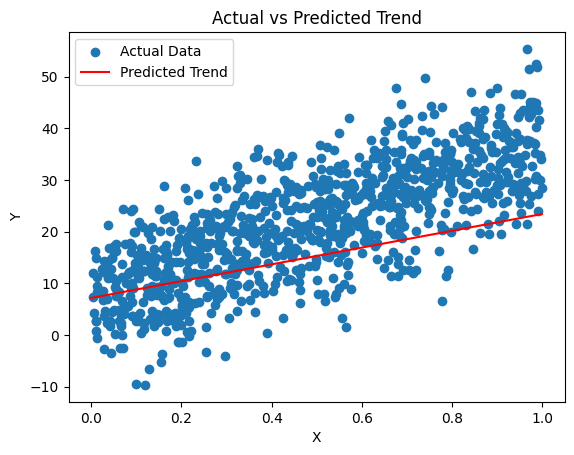

In [196]:
ShowTendency(X[:,0],X_,Y,y_pred1)

In [197]:
W_df = pd.read_csv('Walmart_Sales.csv')
W_df=W_df.drop(columns=['Store','Date','Unemployment','Holiday_Flag'])
W_df=W_df.drop_duplicates(keep='first')

In [198]:
W_df_np=W_df.to_numpy()
W_df_np_ones=np.ones([W_df_np.shape[0],W_df_np.shape[1]+1])
W_df_np_ones[:,:-1]=W_df_np
print(W_df)
print(W_df_np[:,0])

      Weekly_Sales  Temperature  Fuel_Price         CPI
0       1643690.90        42.31       2.572  211.096358
1       1641957.44        38.51       2.548  211.242170
2       1611968.17        39.93       2.514  211.289143
3       1409727.59        46.63       2.561  211.319643
4       1554806.68        46.50       2.625  211.350143
...            ...          ...         ...         ...
6430     713173.95        64.88       3.997  192.013558
6431     733455.07        64.89       3.985  192.170412
6432     734464.36        54.47       4.000  192.327265
6433     718125.53        56.47       3.969  192.330854
6434     760281.43        58.85       3.882  192.308899

[6435 rows x 4 columns]
[1643690.9  1641957.44 1611968.17 ...  734464.36  718125.53  760281.43]


In [199]:
RS_df = pd.read_csv('Real estate.csv')
RS_df=RS_df.drop(columns=['No','X1 transaction date','X5 latitude','X6 longitude'])
RS_df=RS_df.drop_duplicates(keep='first')

In [200]:
RS_df_np=RS_df.to_numpy()
RS_df_np_ones=np.ones([RS_df_np.shape[0],RS_df_np.shape[1]+1])
RS_df_np_ones[:,1:]=RS_df_np
print(RS_df)

     X2 house age  X3 distance to the nearest MRT station  \
0            32.0                                84.87882   
1            19.5                               306.59470   
2            13.3                               561.98450   
3            13.3                               561.98450   
4             5.0                               390.56840   
..            ...                                     ...   
409          13.7                              4082.01500   
410           5.6                                90.45606   
411          18.8                               390.96960   
412           8.1                               104.81010   
413           6.5                                90.45606   

     X4 number of convenience stores  Y house price of unit area  
0                                 10                        37.9  
1                                  9                        42.2  
2                                  5                        47.3  

In [201]:
print(W_df_np[:,0])

[1643690.9  1641957.44 1611968.17 ...  734464.36  718125.53  760281.43]


In [202]:
Beta_WDF=LinearRegression1D(W_df_np_ones[:,1],W_df_np[:,0])
print(Beta_WDF)

[  -1952.41922721 1165224.93665615]


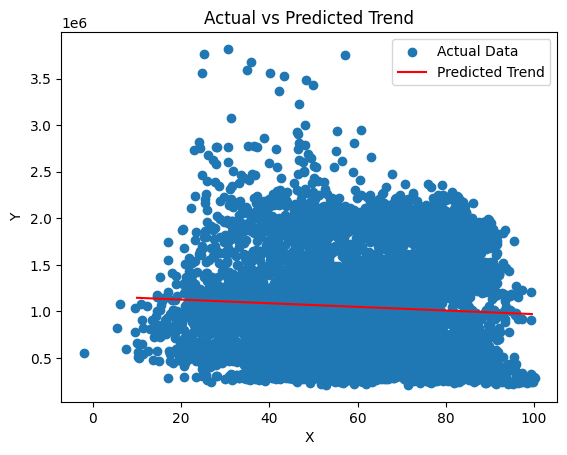

In [203]:
WDF=np.arange(10,100,0.5)
Y_pred_WDF=WDF*Beta_WDF[0]+Beta_WDF[1]
ShowTendency(W_df_np_ones[:,1],WDF,W_df_np[:,0],Y_pred_WDF)

In [204]:
print(W_df_np_ones[:,1])

[42.31 38.51 39.93 ... 54.47 56.47 58.85]


In [205]:
Betas_WDF=LinearRegressionMD(W_df_np_ones[:,1:],W_df_np[:,0])
print(Betas_WDF)

[-1.64668784e+03  8.22696728e+03 -8.88673762e+02  1.27170526e+06]


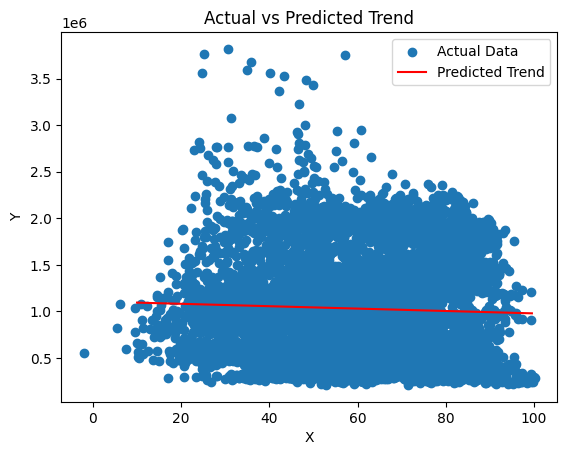

In [206]:
WDF_2=np.ones([180,4])
WDF_2[:,0]=np.arange(10,100,0.5)
WDF_2[:,1]=np.arange(2,3.8,0.01)
WDF_2[:,2]=np.arange(200,180,-0.1111111111111111)
Y_pred_WDF_2=WDF_2@Betas_WDF
ShowTendency(W_df_np_ones[:,1],WDF_2[:,0],W_df_np_ones[:,0],Y_pred_WDF_2)

In [207]:
Beta_RS=LinearRegression1D(RS_df_np_ones[:,1],RS_df_np_ones[:,-1])
print(Beta_RS)

[-0.25148842 42.33244476]


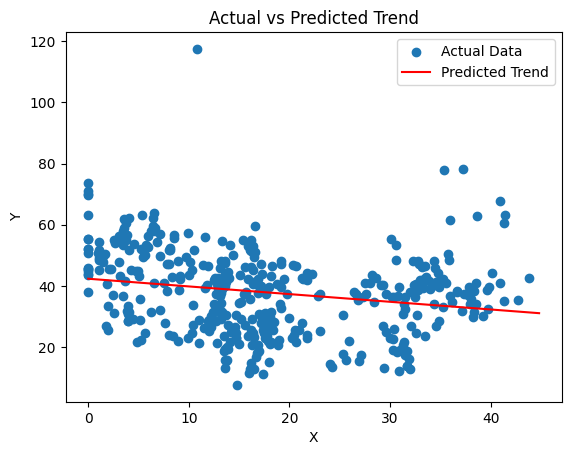

In [208]:
RSDF=np.arange(0,45,0.4)
Y_pred_RSDF=RSDF*Beta_RS[0]+Beta_RS[1]
ShowTendency(RS_df_np_ones[:,1],RSDF,RS_df_np_ones[:,-1],Y_pred_RSDF)

In [209]:
Betas_RS=LinearRegressionMD(RS_df_np_ones[:,:-1],RS_df_np_ones[:,-1])
print(Betas_RS)

[ 4.29772862e+01 -2.52855827e-01 -5.37912962e-03  1.29744248e+00]


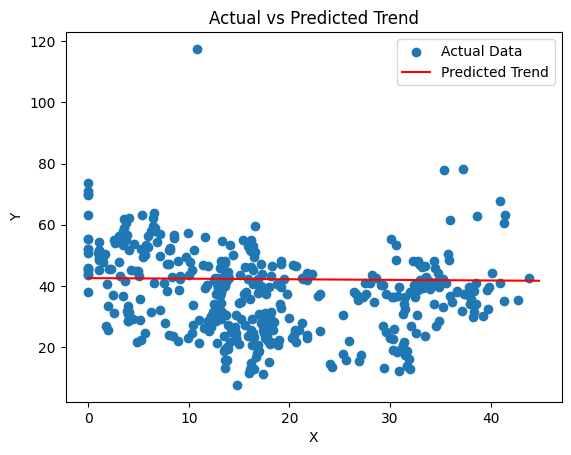

In [210]:
RSDF_2=np.ones([113,4])
RSDF_2[:,1]=np.arange(0,45,0.4)
RSDF_2[:,2]=np.arange(80,532,4)
RSDF_2[:,3]=np.arange(0,10,0.0885)
Y_pred_RSDF_2=RSDF_2@Betas_RS
ShowTendency(RS_df_np_ones[:,1],RSDF_2[:,1],RS_df_np_ones[:,-1],Y_pred_RSDF_2)